In [229]:
import pandas as pd
import numpy as np
from numpy import asarray
from IPython.display import Audio
import pickle

import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

#### Get some audio to test 
It could be from training or testing, we just want to tst the whole pipeline here

In [179]:
path_predictions = "prediction/"
path_audio = "audio_hex-pickup_debleeded/"
df = pd.read_csv("labels/chords_comp_clean.csv", index_col=0)

In [180]:
df.head()

,id,track_name,time,duration,chord_instructed,chord_played,to_keep
0,00_BN1-129-Eb_comp_1,00_BN1-129-Eb_comp,7.441860,3.720930,G#:maj,G#:maj6(*5)/1,True
1,00_BN1-129-Eb_comp_2,00_BN1-129-Eb_comp,11.162791,3.720930,D#:maj,D#:maj7/1,True
2,00_BN1-129-Eb_comp_3,00_BN1-129-Eb_comp,14.883721,1.860465,A#:maj,A#:maj/1,True
3,00_BN1-129-Eb_comp_4,00_BN1-129-Eb_comp,16.744186,1.860465,G#:maj,"G#:maj6(2,b5,*5)/1",True
4,00_BN1-129-Eb_comp_5,00_BN1-129-Eb_comp,18.604651,3.719749,D#:maj,D#:maj7/1,True


In [181]:
# load first Audio song
track_name = df['track_name'][0]
start = df['time'][0]
duration = df['duration'][0]
chord = df['chord_instructed'][0]
chord

'G#:maj'

In [111]:
# listen to audio file
data, sr = librosa.load(path_audio + track_name + "_hex_cln.wav", offset=start, duration=duration)
Audio(data=data, rate=sr)

In [127]:
from scipy.io.wavfile import write

In [151]:
# export this audio to a wav file (librosa didn't work) - THIS DOESN'T WORK
data, sr = sf.read(path_audio + track_name + "_hex_cln.wav",  start=0, stop =50)
sf.write(path_predictions+'track2.wav', data, sr)

#### Transform into chomagram `create_chromagram` function

In [132]:
# functions
def create_chromagram(data, sr):
    chromagram = librosa.feature.chroma_cens(data, sr)
    chromagram_mag = librosa.magphase(chromagram)[0]**4
    
    # save image
    fig = plt.figure(figsize=(2, 2))
    librosa.display.specshow(chromagram_mag, sr=sr, cmap='gray')
    fig.savefig(path_predictions + 'picture')
    return fig

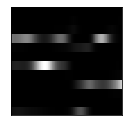

In [113]:
fig = create_chromagram(data, sr)

#### prepare pixel data `prep_pixels` function

In [131]:
def prep_pixels():
    # load photo
    data = load_img(path_predictions + 'picture.png', color_mode = "grayscale", target_size=(64,64))
    data = img_to_array(data)
    # convert to np array
    data = asarray(data)
    # normalize to range 0-1
    data = data/255.0
    data = data.reshape(1, 64, 64, 1)
    return data

In [116]:
data = prep_pixels()

In [117]:
data.shape

(1, 64, 64, 1)

#### make predictions `make_prediction` function

In [118]:
model = load_model('final_model.h5')

In [119]:
y_pred = model.predict_classes(data)

In [120]:
filename = 'labelencoder.sav'
le = pickle.load(open(filename, 'rb'))

In [121]:
y_chord = le.inverse_transform(y_pred)
y_chord

array(['G#:maj'], dtype=object)

In [158]:
def make_predictions(data):
    model = load_model('final_model.h5')
    y_pred = model.predict_classes(data)
    filename = 'labelencoder.sav'
    le = pickle.load(open(filename, 'rb'))
    y_chord = le.inverse_transform(y_pred)
    return y_chord

# Whole Pipeline

In [188]:
def predict(data, sr):
    create_chromagram(data, sr)
    data = prep_pixels()
    chord = make_predictions(data)
    return chord

#### first line in dataset

In [222]:
# load first Audio song
track_name = df['track_name'][0]
start = df['time'][0]
duration = df['duration'][0]
chord = df['chord_instructed'][0]
chord

'G#:maj'

In [183]:
data, sr = librosa.load(path_audio + track_name + "_hex_cln.wav", offset=start, duration=duration)
Audio(data=data, rate=sr)

['G#:maj']


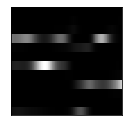

In [189]:
chord_pred = predict(data, sr)
print(chord_pred)

#### try other lines in dataset

True chord: F#:maj 
 Predicted chord['F#:maj']


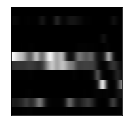

In [196]:
# line 5
line = 5
track_name = df['track_name'][line]
start = df['time'][line]
duration = df['duration'][line]
chord = df['chord_instructed'][line]

data, sr = librosa.load(path_audio + track_name + "_hex_cln.wav", offset=start, duration=duration)
chord_pred = predict(data, sr)
print(f'True chord: {chord} \n Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

True chord: D#:maj 
 Predicted chord['D#:maj']


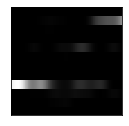

In [197]:
line = 1
track_name = df['track_name'][line]
start = df['time'][line]
duration = df['duration'][line]
chord = df['chord_instructed'][line]

data, sr = librosa.load(path_audio + track_name + "_hex_cln.wav", offset=start, duration=duration)
chord_pred = predict(data, sr)
print(f'True chord: {chord} \n Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=844
  warnings.warn(


True chord: C#:min 
 Predicted chord['C#:min']


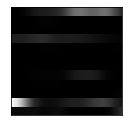

In [192]:
line = 100
track_name = df['track_name'][line]
start = df['time'][line]
duration = df['duration'][line]
chord = df['chord_instructed'][line]

data, sr = librosa.load(path_audio + track_name + "_hex_cln.wav", offset=start, duration=duration)
chord_pred = predict(data, sr)
print(f'True chord: {chord} \n Predicted chord{chord_pred}')

True chord: E:maj 
 Predicted chord['E:maj']


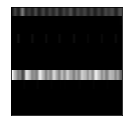

In [198]:
# from testing data: after index 1325
line = 1500
track_name = df['track_name'][line]
start = df['time'][line]
duration = df['duration'][line]
chord = df['chord_instructed'][line]

data, sr = librosa.load(path_audio + track_name + "_hex_cln.wav", offset=start, duration=duration)
chord_pred = predict(data, sr)
print(f'True chord: {chord} \n Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=844
  warnings.warn(


True chord: E:maj 
 Predicted chord['C#:min']


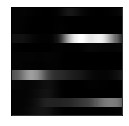

In [207]:
# from testing data: after index 1325
line = 1370
track_name = df['track_name'][line]
start = df['time'][line]
duration = df['duration'][line]
chord = df['chord_instructed'][line]

data, sr = librosa.load(path_audio + track_name + "_hex_cln.wav", offset=start, duration=duration)
chord_pred = predict(data, sr)
print(f'True chord: {chord} \n Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

# Trying to record my own samples

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=824
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=412
  warnings.warn(


Predicted chord['G:min']


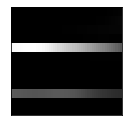

In [208]:
data, sr = librosa.load(path_predictions + "gmaj.m4a")
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Predicted chord['F:maj']


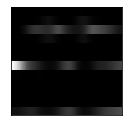

In [205]:
data, sr = librosa.load(path_predictions + "fmaj.m4a")
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=824
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=412
  warnings.warn(


Predicted chord['C:maj']


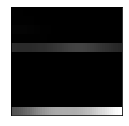

In [209]:
data, sr = librosa.load(path_predictions + "cmaj.m4a")
Audio(data=data, rate=sr)
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=716
  warnings.warn(


Predicted chord['C:maj']


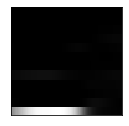

In [211]:
data, sr = librosa.load(path_predictions + "cmaj_piano.m4a")
Audio(data=data, rate=sr)
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=676
  warnings.warn(


Predicted chord['E:min']


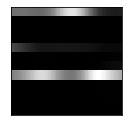

In [215]:
data, sr = librosa.load(path_predictions + "Emin_piano.m4a")
Audio(data=data, rate=sr)
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=844
  warnings.warn(


Predicted chord['E:min']


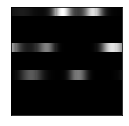

In [216]:
data, sr = librosa.load(path_predictions + "Emin2_piano.m4a")
Audio(data=data, rate=sr)
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=540
  warnings.warn(


Predicted chord['C#:maj']


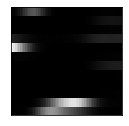

In [217]:
data, sr = librosa.load(path_predictions + "Cmaj_voice.m4a")
Audio(data=data, rate=sr)
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

In [225]:
# success
data, sr = librosa.load(path_predictions + "paul1.m4a")
Audio(data=data, rate=sr)
chord_pred = predict(data, sr)
print(f'Predicted chord{chord_pred}')
Audio(data=data, rate=sr)

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


TypeError: predict() takes 1 positional argument but 2 were given

# Try other preduction function

In [236]:
def predict(filename):
    path_predictions = "prediction/"
    data, sr = librosa.load(path_predictions + filename)
    create_chromagram(data, sr)
    data = prep_pixels()
    chord = make_predictions(data)
    print(f'Predicted chord{chord}')
    return chord

/opt/conda/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Predicted chord['D:min']


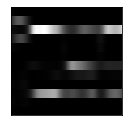

In [237]:
chord = predict("paul1.m4a")

# Try recording live

In [ ]:
# record audio chord
def record_audio():
    audio_save_path = configure.get_audio_recording_file_path()
    au.record_and_save_audio(chunk_size=configure.settings["record_audio"]["chunk_size"],
                             channels=configure.settings["record_audio"]["channels"],
                             sample_rate=configure.settings["record_audio"]["sample_rate"],
                             record_seconds=configure.settings["record_audio"]["record_seconds"],
                             audio_save_file_path=audio_save_path)